<a href="https://colab.research.google.com/github/GreNinja47/Time-Series-Forecasting-of-Sales-and-Consumer-purchase-/blob/main/Basic_Forecasting_Meta_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_store = pd.read_csv("/content/gdrive/MyDrive/TS_Forecaset_Dataset/store.csv")
d_par = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df_train = pd.read_csv("/content/gdrive/MyDrive/TS_Forecaset_Dataset/train.csv", parse_dates=['Date'], date_parser=d_par)

<ipython-input-177-2bde778484d1>:3: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-177-2bde778484d1>:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
df = pd.merge(df_train, df_store, how = 'inner', on = 'Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
selected_stores_ids= [1]
df=df[df.Store.isin(selected_stores_ids)]
df.shape

(942, 18)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.sort_values(by='Date', ascending=True)

In [ ]:
df.set_index(df['Date'], inplace=True)

In [ ]:
df.isna().sum()

Store                          0
DayOfWeek                      0
Date                           0
Sales                          0
Customers                      0
Open                           0
Promo                          0
StateHoliday                   0
SchoolHoliday                  0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              942
Promo2SinceYear              942
PromoInterval                942
dtype: int64

In [ ]:
# closed stores won't generate sales, so we will remove this part of the dataset

df = df.drop(df[df['Open'] == 0].index, axis=0)

<Axes: title={'center': 'Store 1 Sales Data'}, xlabel='Date'>

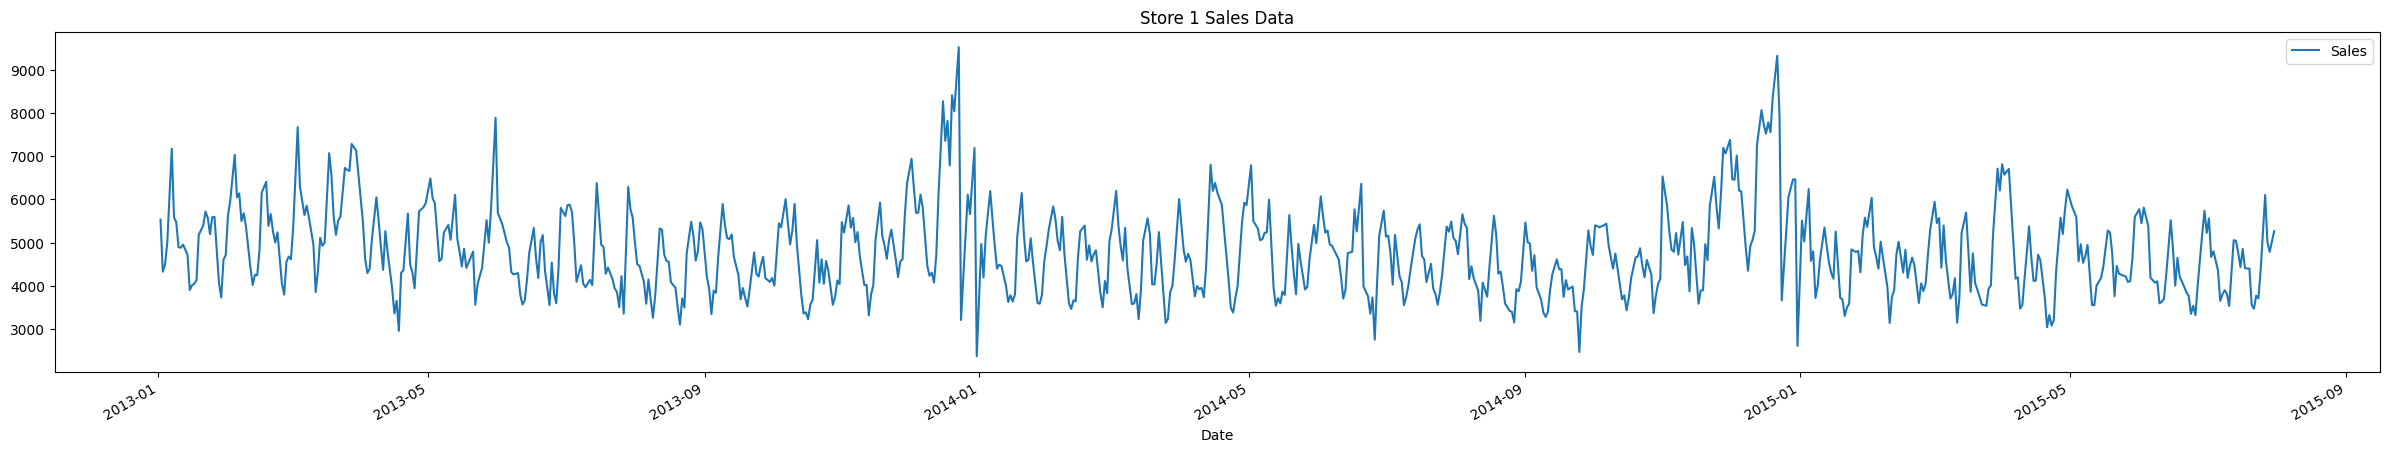

In [ ]:
df.plot(y='Sales',figsize = (30,5), title = "Store 1 Sales Data")

<Axes: title={'center': 'Store 1 Customers Data'}, xlabel='Date'>

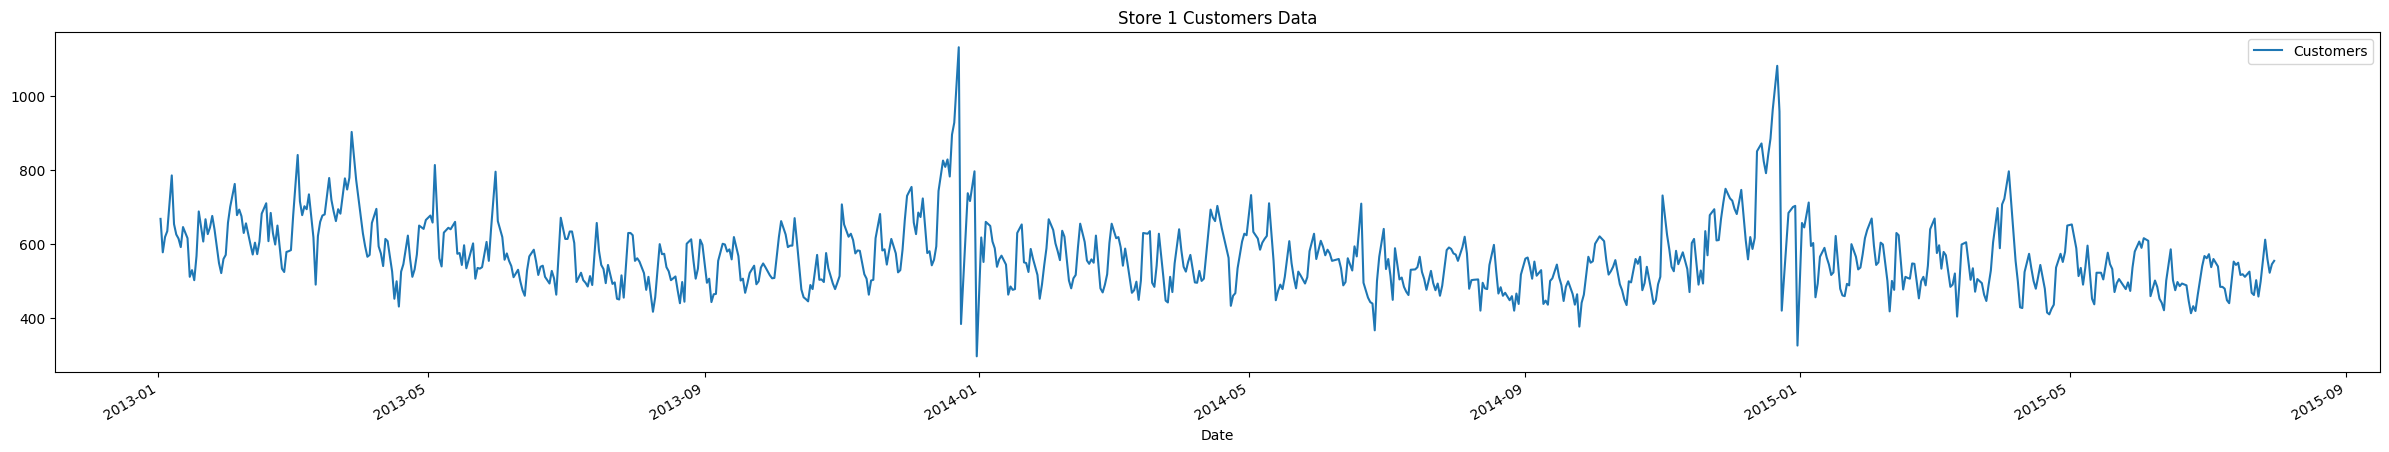

In [ ]:
df.plot(y='Customers',figsize = (30,5), title = "Store 1 Customers Data")

In [ ]:
df['Sales'].describe(percentiles=[0.01,0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98, 0.99])

count     781.000000
mean     4759.096031
std      1012.106393
min      2362.000000
1%       3128.000000
5%       3430.000000
10%      3593.000000
25%      4000.000000
50%      4647.000000
75%      5348.000000
90%      6008.000000
98%      7365.600000
99%      7906.200000
max      9528.000000
Name: Sales, dtype: float64

In [ ]:
df['Customers'].describe(percentiles=[0.01,0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98, 0.99])

count     781.000000
mean      564.049936
std        93.707476
min       298.000000
1%        415.600000
5%        446.000000
10%       464.000000
25%       500.000000
50%       550.000000
75%       612.000000
90%       678.000000
98%       810.000000
99%       873.600000
max      1130.000000
Name: Customers, dtype: float64

In [ ]:
#capping
percentiles = df['Sales'].quantile([0.01,0.99]).values
df['Sales'][df['Sales'] <= percentiles[0]] = percentiles[0]
df['Sales'][df['Sales'] >= percentiles[1]] = percentiles[1]

percentiles = df['Customers'].quantile([0.01,0.99]).values
df['Customers'][df['Customers'] <= percentiles[0]] = percentiles[0]
df['Customers'][df['Customers'] >= percentiles[1]] = percentiles[1]

<ipython-input-190-187cd00e5c02>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-190-187cd00e5c02>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-190-187cd00e5c02>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-191-8b5a9e6aaff2>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




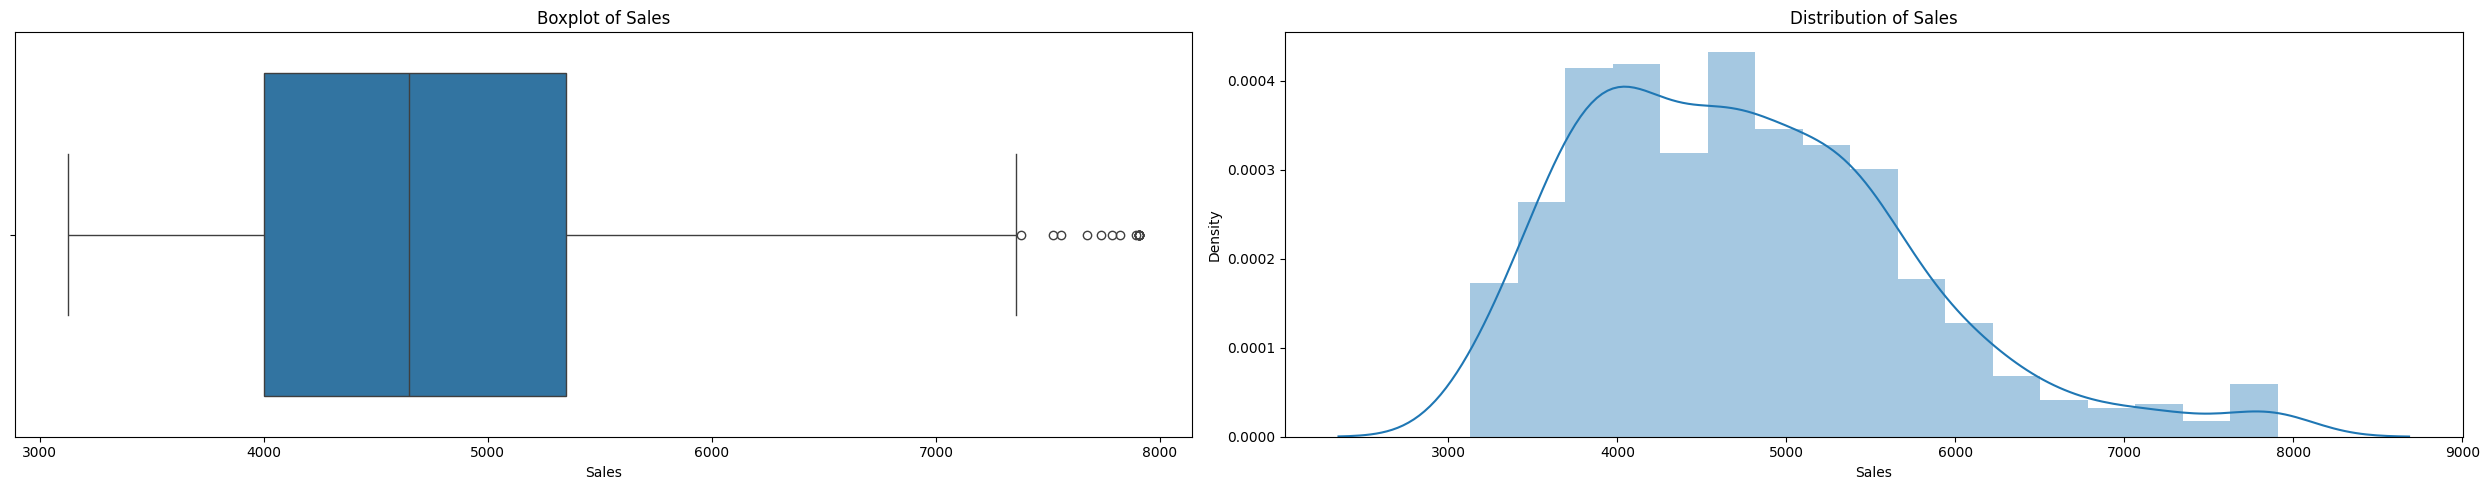

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

# Plot 1: Boxplot
sns.boxplot(ax=axes[0], x=df['Sales'])
axes[0].set_title('Boxplot of Sales')
axes[0].set_xlabel('Sales')

# Plot 2: Distribution plot
sns.distplot(ax=axes[1], x=df['Sales'])
axes[1].set_title('Distribution of Sales')
axes[1].set_xlabel('Sales')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-192-b3b45d55db54>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




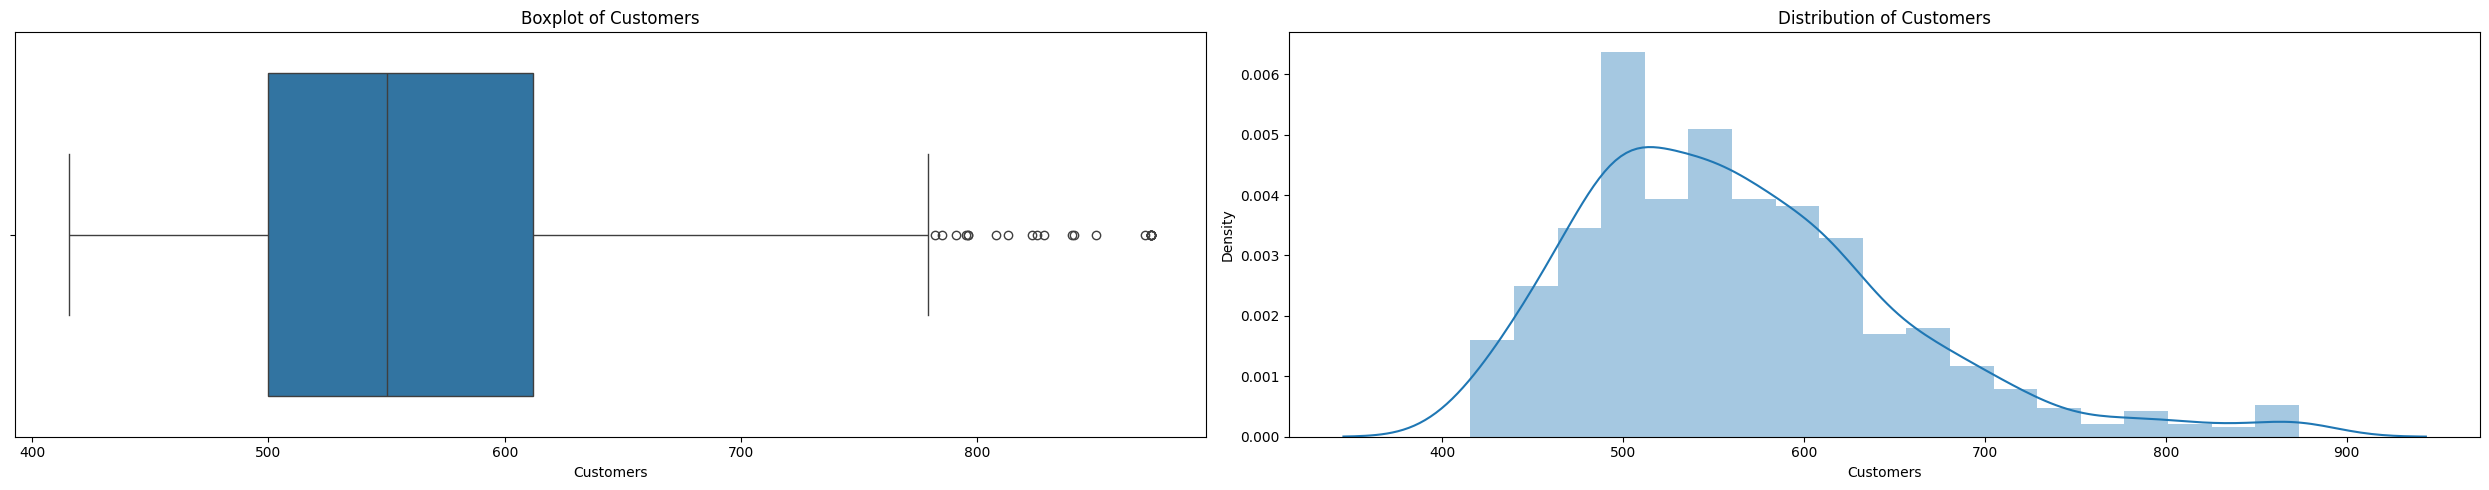

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

# Plot 1: Boxplot
sns.boxplot(ax=axes[0], x=df['Customers'])
axes[0].set_title('Boxplot of Customers')
axes[0].set_xlabel('Customers')

# Plot 2: Distribution plot
sns.distplot(ax=axes[1], x=df['Customers'])
axes[1].set_title('Distribution of Customers')
axes[1].set_xlabel('Customers')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

<Axes: title={'center': 'Store 1 Sales'}, xlabel='Date'>

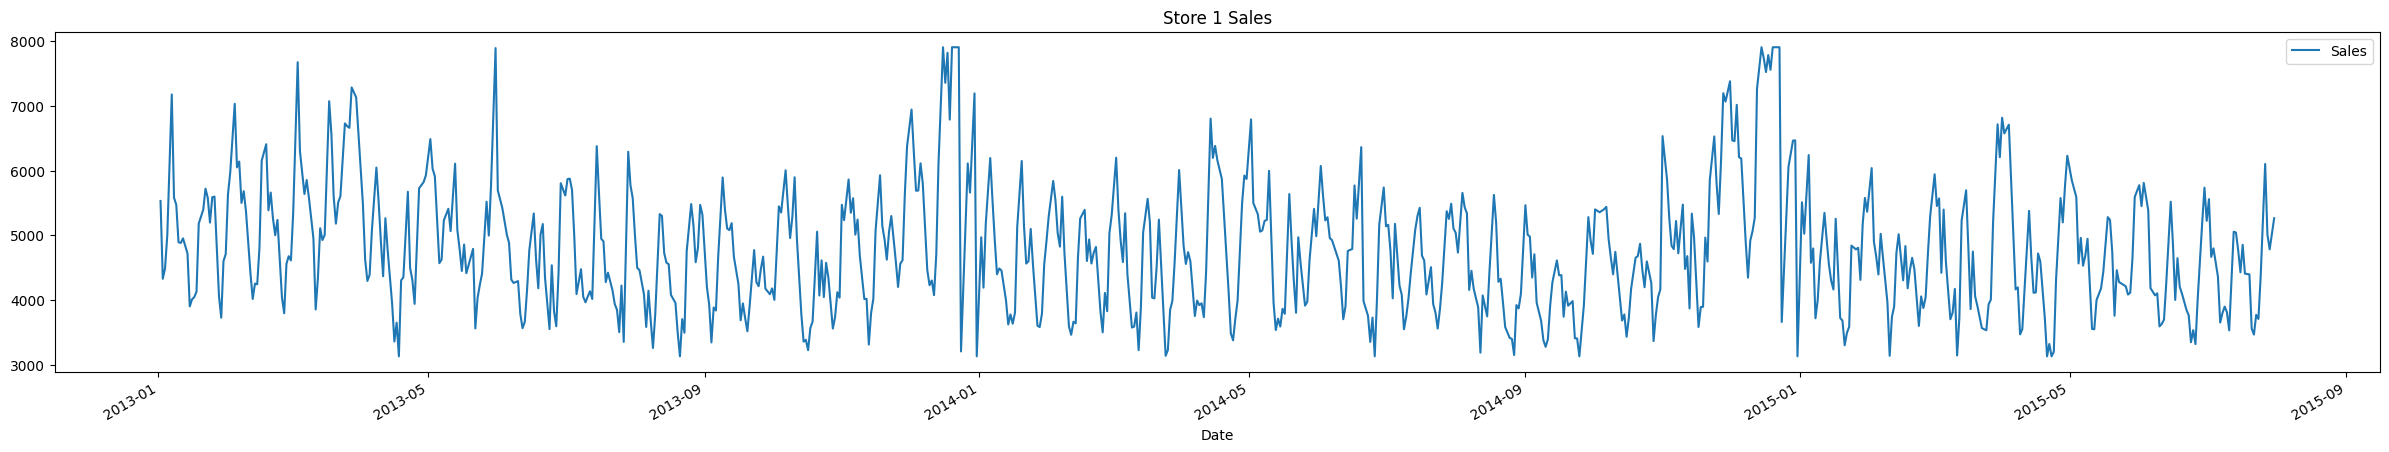

In [ ]:
df.plot(y='Sales',figsize = (30,5), title = "Store 1 Sales")

<Axes: title={'center': 'Store 1 Customers'}, xlabel='Date'>

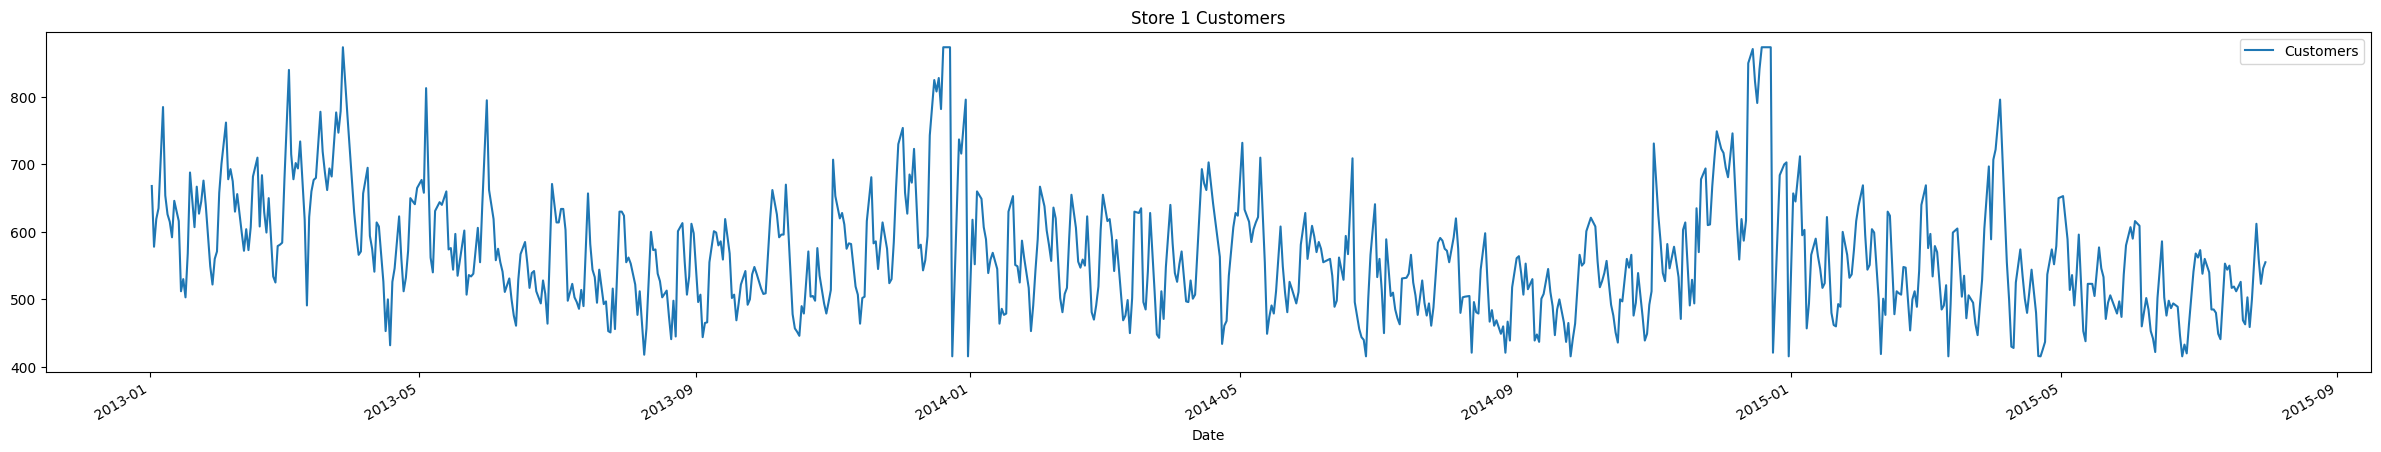

In [ ]:
df.plot(y='Customers',figsize = (30,5), title = "Store 1 Customers")

In [ ]:
selected_stores_ids= [1]
df=df[df.Store.isin(selected_stores_ids)]
df.shape

(781, 18)

Sales

In [ ]:
# Select "Date" and "Sales" columns from df
df_sal = df[["Date", "Sales"]].copy()

# Drop index inplace
df_sal.reset_index(drop=True, inplace=True)

# Display the first few rows
print(df_sal.head())

        Date   Sales
0 2013-01-02  5530.0
1 2013-01-03  4327.0
2 2013-01-04  4486.0
3 2013-01-05  4997.0
4 2013-01-07  7176.0


In [ ]:
df_sal.columns = ['ds','y']

In [ ]:
df_sal['ds'] = pd.to_datetime(df_sal['ds'])
df_sal.tail()

,ds,y
776,2015-07-27,6102.0
777,2015-07-28,5011.0
778,2015-07-29,4782.0
779,2015-07-30,5020.0
780,2015-07-31,5263.0


<Axes: xlabel='ds'>

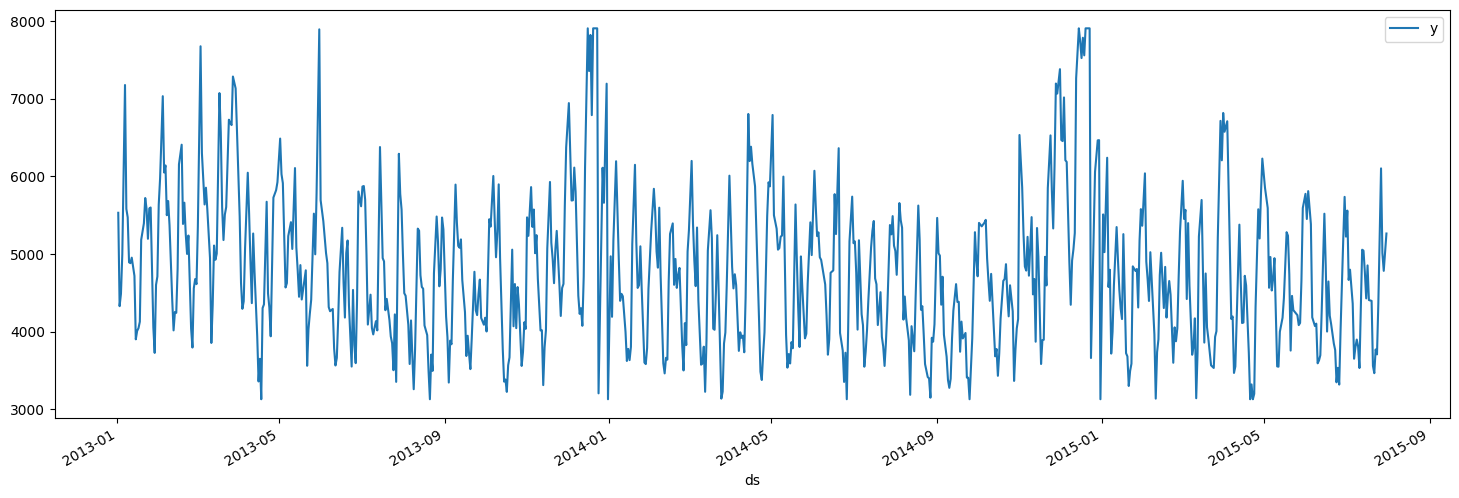

In [ ]:
df_sal.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train_sal = df_sal.iloc[:len(df_sal)-30]
test_sal = df_sal.iloc[len(df_sal)-30:]

In [ ]:
m = Prophet()
m.fit(train_sal)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50mtgxyq/9kt9x8zh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50mtgxyq/bva22yqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41716', 'data', 'file=/tmp/tmp50mtgxyq/9kt9x8zh.json', 'init=/tmp/tmp50mtgxyq/bva22yqu.json', 'output', 'file=/tmp/tmp50mtgxyq/prophet_model2rrdtvpi/prophet_model-20240315192409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:24:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
predictions = forecast.iloc[-30:]['yhat']

In [ ]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

# Calculate Root Mean Squared Error (RMSE)
rmse_value = rmse(test_sal['y'], predictions)
print("Root Mean Squared Error between actual and predicted values: ", rmse_value)

# Calculate Mean Absolute Error (MAE)
mae_value = mean_absolute_error(test_sal['y'], predictions)
print("Mean Absolute Error between actual and predicted values: ", mae_value)

Root Mean Squared Error between actual and predicted values:  776.0846491577128
Mean Absolute Error between actual and predicted values:  657.9349723397538


Customers

In [ ]:
# Select "Date" and "Sales" columns from df
df_cust = df[["Date", "Customers"]].copy()

# Drop index inplace
df_cust.reset_index(drop=True, inplace=True)

# Display the first few rows
print(df_cust.head())

        Date  Customers
0 2013-01-02      668.0
1 2013-01-03      578.0
2 2013-01-04      619.0
3 2013-01-05      635.0
4 2013-01-07      785.0


In [ ]:
df_cust.columns = ['ds','y']

In [ ]:
df_cust['ds'] = pd.to_datetime(df_cust['ds'])
df_cust.tail()

,ds,y
776,2015-07-27,612.0
777,2015-07-28,560.0
778,2015-07-29,523.0
779,2015-07-30,546.0
780,2015-07-31,555.0


<Axes: xlabel='ds'>

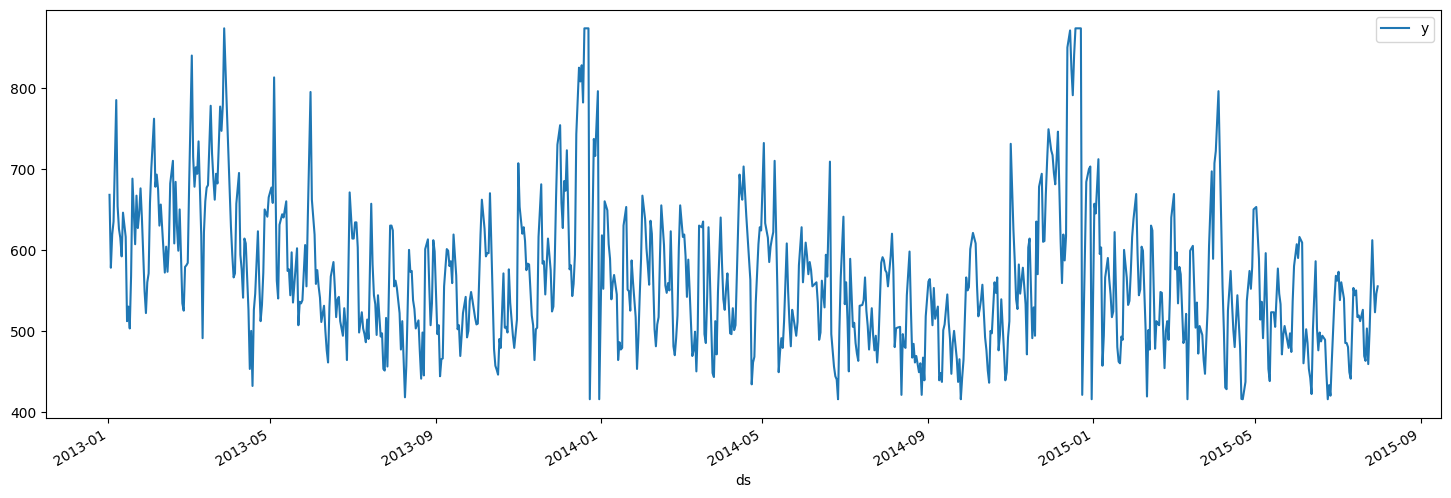

In [ ]:
df_cust.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train_cust = df_cust.iloc[:len(df_cust)-30]
test_cust = df_cust.iloc[len(df_cust)-30:]

In [ ]:
m = Prophet()
m.fit(train_cust)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50mtgxyq/mgbv82v5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50mtgxyq/xvfqyyvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44605', 'data', 'file=/tmp/tmp50mtgxyq/mgbv82v5.json', 'init=/tmp/tmp50mtgxyq/xvfqyyvy.json', 'output', 'file=/tmp/tmp50mtgxyq/prophet_modelyv42ekpm/prophet_model-20240315192410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:24:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:24:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
predictions = forecast.iloc[-30:]['yhat']

In [ ]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

# Calculate Root Mean Squared Error (RMSE)
rmse_value = rmse(test_cust['y'], predictions)
print("Root Mean Squared Error between actual and predicted values: ", rmse_value)

# Calculate Mean Absolute Error (MAE)
mae_value = mean_absolute_error(test_cust['y'], predictions)
print("Mean Absolute Error between actual and predicted values: ", mae_value)

Root Mean Squared Error between actual and predicted values:  65.56923041096812
Mean Absolute Error between actual and predicted values:  52.39233386039837
